# AAE 875 - Fundamentals of OOP and Data Analytics
# Week 5 - Summer 2019

<br>
<br>
<br>

My goal today is to give you a tour of the key Python packages used for **data visualization, descriptive statistics and regression analysis**. I am going to assume that you have already read the corresponding chapters in zyBooks.

The model we are going to run today will explore the cross-sectional infidelity data collected by the magazine Psychology Today in 1969. The economist Ray C. Fair used it the to develop "A Theory of Extramarital Affairs" (Fair, 1978).

The data consists of 601 observations on 9 variables as follows. Please see the original paper for more details. Note that I slightly altered the original data for the purposes of this class:

    Number of observations: 601
    Number of variables: 9
    Variable name definitions:


        sex             : Respondent gender: male or female
        age             : Respondent age
        yrs_married     : Number of years married
        children        : yes or no
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
                        technician, skilled worker, 5 = managerial,
                        administrative, business, 6 = professional with
                        advanced degree
       rate_marriage    : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
       nb_of_affairs    : number of extramarital affairs

    
    See the original paper for more details. 

<br>

Let us first inspect/clean the data and then use the clean version to answer the following questions:

**Data Visualization and Descriptive Statistics** <br>
[1] Of all the people sampled, how many had affairs? How many women had affairs? How many men had affairs?

[2] Plot the age distribution of people who had identified as having at least one affair by sex.

[3] Plot the yrs_married distribution of people who had identified as having at least one affair by sex.

[4] Of all the people that had affairs, how many fall into each education category?

[5] Of all the people that had affairs, how many had children?

[5] For each religious rating, what was the average number of affairs?

[6] For each marriage satisfation rating, what was the average number of affairs?

[7] For each occupation category, what was the average number of affairs?

**Regression Analysis** <br>
[1] Predict the probability of having an affair using the tools available in Python for discrete choice models (hint: statsmodels.formula.api). First fit a Logit model. Then fit a Tobit model. Can you conclude that the "correct" model is likely the Tobit model? Explain.

## `Data cleaning`

### Import packages 
Good practice is to import all packages/modules at the top of your script.

In [4]:
import csv
import seaborn as sns
import matplotlib.pyplot as plt

### Load data
I decided to work with nested lists. The built-in csv package works just fine for this task. I encourage you to do the same if you want to develop your coding skillls. You can also use a third-party library such as Pandas (Q: what is the type of dataframe you will be working with in this case?).

In [5]:
# open the file
csvfile = open("affairs.csv", "r", newline = "")
# read the file
affairs = list(csv.reader(csvfile, delimiter = ","))

### Print columns names and the first 5 rows of data
Do not attempt to run a regression model before insepecting/cleaning your data. Data is messy most of the time! Fix issues (e.g. missing values) before you think about an econometric model. <br>

Hint: use print() statements from place to place to explain what you are doing or what is the output of specific blocks of code.

In [6]:
# print the column names
print("The column names are:\n", affairs[0], "\n")

# print the first 5 rows of data
print("The first 5 rows of data are:")
for row in affairs[1:5+1]:
    print("[", end = " ")
    for cell in row:
        print(cell, end = " ")
    print("]")    

The column names are:
 ['x', 'sex', 'age', 'yrs_married', 'children', 'religious', 'education', 'occupation', 'rate_marriage', 'nb_of_affairs'] 

The first 5 rows of data are:
[ na na 37 10 no 3 na 7 4 0 ]
[ 2 female 27 4 no 4 14 6 4 0 ]
[ 3 female 32 15 yes 1 12 1 4 0 ]
[ na na 57 15 na 5 na 6 na na ]
[ 5 male 22 0.75 no 2 17 6 3 0 ]


### Print the number of rows and the number of columns
The "quality" of your regression estimates depend on the answer to this question.

In [7]:
print("The affairs data has", len(affairs), "rows and", len(affairs[0]),"columns.")

The affairs data has 602 rows and 10 columns.


### Print the data type of each column
Hint: do not run a regression model if you don't understand what data type each column represents... why? it really matters for results interpretation.

In [8]:
iter = 1 #skips the column names
for row_index, row in enumerate(affairs):
    if row_index == 1:
        for cell in row:
            print(type(cell))
print("Important: the csv.reader() method returns a list of strings!")                  

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
Important: the csv.reader() method returns a list of strings!


### Rename the x variable to resp_id
Variable names should be easy to understand. One week from now you won't remember what this "x" stands for.

In [9]:
try:
    index_of_x = affairs[0].index("x")
    affairs[0][index_of_x] = "resp_id"
    print("The variable \"x\" has been renamed to", affairs[0][index_of_x], end = ".")
except ValueError:
    print("Variable \"x\" has already been renamed to resp_id.")   

The variable "x" has been renamed to resp_id.

### Are there any missing values (na's) in the data?
in this data missing values are marked with "na" but missing values can take different forms as well (e.g. blank cell, period (.), Null etc).

In [10]:
try:
    for row_index, row in enumerate(affairs):
        if row_index == 0: #skip row with column names
            continue
        for cell in row:
            if cell == "na":
                raise ValueError("Missing value in cell.")
except ValueError as excpt:
    print(excpt)

Missing value in cell.


### Print rows with missing values (na's)
This step helps you inspect what is actually missing from each row. How critical is the missing information?

In [11]:
row_index_tbr = []  #tbr stands for to be removed
print("Printing rows with missing values:")
for row_index, row in enumerate(affairs):
    if row_index == 0: #skip row with column names
        continue
    for cell_index, cell in enumerate(row):
        if cell == "na":
            print(row)
            row_index_tbr.append(row_index)
            break   
            
print("\nRow indexes with missing values are:\n", row_index_tbr)

Printing rows with missing values:
['na', 'na', '37', '10', 'no', '3', 'na', '7', '4', '0']
['na', 'na', '57', '15', 'na', '5', 'na', '6', 'na', 'na']

Row indexes with missing values are:
 [1, 4]


### Remove rows with missing values (na's)
You decide what you do with missing values. If you have lots of data removing a couple of rows won't be an issue; otherwise you need to think twice what to do with missing values (e.g. use an imputation method).

For this data I decided to drop the two observations with na's.

In [12]:
temp_affairs = [] # empty list. I will create a new nested list equal with affairs but rows to be removed
n = 1

for row_index, row in enumerate(affairs):
    if row_index in row_index_tbr: #skip rows to be removed (tbr)
        print(n,"row(s) less")
        n += 1 # count number of rows skipped
        continue
    temp_affairs.append(row)
    
# just to check everything looks OK print the first 5 rows of data 
# hint we already know that rows 1 an 4 had missing values
print("\nThe first 5 rows of data are:")
for row in range(1,6):
    print(temp_affairs[row])   

1 row(s) less
2 row(s) less

The first 5 rows of data are:
['2', 'female', '27', '4', 'no', '4', '14', '6', '4', '0']
['3', 'female', '32', '15', 'yes', '1', '12', '1', '4', '0']
['5', 'male', '22', '0.75', 'no', '2', '17', '6', '3', '0']
['6', 'female', '32', '1.5', 'no', '2', '17', '5', '5', '0']
['7', 'female', '22', '0.75', 'no', '2', '12', '1', '3', '0']


### Keep only one reader (data) object
Given that the loop above works as desired we can now overwrite the affairs data.

In [13]:
affairs = temp_affairs
del temp_affairs

### What is the number of rows and columns now?

Final check that data cleaning worked as desired.

In [14]:
print("The affairs data has", len(affairs), "rows and", len(affairs[0]),"columns.")

The affairs data has 600 rows and 10 columns.


### Change column data types
As you can immagine doing data visuzalization, descriptive statistics and regression analysis with string only data types is not really a good idea. Let's change the types of our columns as follows:
* type([resp_id, age, yrs_married, religious, education, occupation, rate_marriage, nb_of_affairs]) = int
* type([sex, children]) = string (Note: nothing to change here; right now all the elements in affairs are strings)


In [15]:
# let's firt find the indexes of the columns that are strings
string_col_index = [affairs[0].index("sex"), affairs[0].index("children")]
print("Index of variable \"sex\" in column names is", string_col_index[0], end = ".\n")
print("Index of variable \"children\" in column names is", string_col_index[1], end = ".\n")


# change the type of all other columns to float
for row_index, row in enumerate(affairs):
    #print(row_index)
    if row_index == 0:
        continue
    if row_index == 38: # for some reason this line of code cannot be trnsformed to integer
        continue
    for cell_index, cell in enumerate(row):
        if cell_index in string_col_index:
            continue
        else:
            affairs[row_index][cell_index] = float(cell)
            
# check that execution worked as planed (print types of the first row of data)
for row_index, row in enumerate(affairs):
    if row_index == 1:
        for cell in row:
            print(type(cell))

Index of variable "sex" in column names is 1.
Index of variable "children" in column names is 4.
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


### Print the number of rows and columns in the data - yes, again
Note: I eliminated one more observation. For some reason the data type transformation got stuck at line 38? can you figure out why? 

In [16]:
print("The affairs data has", len(affairs), "rows and", len(affairs[0]),"columns.")

The affairs data has 600 rows and 10 columns.


<br>


## `Data visualization/statistics`

### Of all the people sampled, how many had affairs? How many women had affairs? How many men had affairs?

Here are some statistics:

The total number of respondents that had affairs is: 151
The total number of women that had affairs is: 72
The total number of men that had affairs is: 78


Text(0, 0.5, 'Number of affairs')

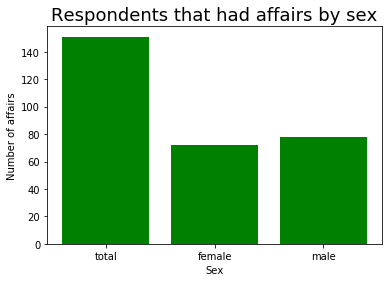

In [37]:
# create list only with individuals that had affairs
had_affair = []  #total
had_affair_f = [] #female only
had_affair_m = [] #male only

for row_index, row in enumerate(affairs):
    for cell_index, cell in enumerate(row):
        
        if cell_index == affairs[0].index("sex"):
            temp_sex = cell
            
        if cell_index == affairs[0].index("nb_of_affairs"):
            if cell == 0.0 or cell == '0':
                continue
            else:
                had_affair.append(cell) # add to total
                if temp_sex == "female":# add to female
                    had_affair_f.append(cell)
                if temp_sex == "male": #add to male
                    had_affair_m.append(cell)

                    
# print statistics
print("Here are some statistics:\n")
print("The total number of respondents that had affairs is:", len(had_affair))
print("The total number of women that had affairs is:", len(had_affair_f))
print("The total number of men that had affairs is:", len(had_affair_m))

# values to be ploted
sex = ["total", "female", "male"]
value = [len(had_affair), len(had_affair_f), len(had_affair_m)]

# set plot title
plt.title('Respondents that had affairs by sex', fontsize = 18)

# add the x-axis and the y-axis to the plot
plt.bar(sex, value, color="green")

# add labels to the axes
plt.xlabel("Sex")
plt.ylabel("Number of affairs")


### Plot the age distribution of people who had identified as having at least one affair by sex.

### Plot the yrs_married distribution of people who had identified as having at least one affair by sex.

### Of all the people that had affairs, how many fall into each education category?

### Of all the people that had affairs, how many had children?

### For each religious rating, what was the average number of affairs?

### For each marriage satisfation rating, what was the average number of affairs?

### For each occupation category, what was the average number of affairs?

### Predict the probability of having an affair using the tools available in Python for discrete choice models

#### Fit a Logit model

#### Fit a Tobit model

#### Can you conclude that the "correct" model is likely the Tobit model? Explain.